<a href="https://colab.research.google.com/github/abdelhedydev/covid-tunisia/blob/master/reg_recovered_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [4]:
recovered_df = pd.read_csv(data_url)

In [5]:
recovered_df.shape

(253, 158)

In [6]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77


In [7]:
recovered_tunisia = recovered_df.loc[recovered_df['Country/Region']=='Tunisia',recovered_df.columns[4:]]
# print(recovered_df)

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
248    Sao Tome and Principe
249                    Yemen
250                  Comoros
251               Tajikistan
252                  Lesotho
Name: Country/Region, Length: 253, dtype: object


In [8]:
recovered_tunisia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,802,807,816,819,826,862,883,903,914,917,919,929,929,938,946,950,960,964,965,965,968,969,977,982,982,982,983,989,995,995,998,999,1002,1004,1006,1014,1017,1020,1020,1023


In [9]:
dates = recovered_tunisia.columns
dates.shape

(154,)

In [10]:
import numpy as np

In [11]:
numeros_dates = np.arange(0,len(dates),1)
recovered_nb = recovered_tunisia.to_numpy().reshape(-1)

In [12]:
df_tunisia = pd.DataFrame({'num_date':numeros_dates,
                           'nombre':recovered_nb},
                           index= dates)

In [13]:
X = df_tunisia['num_date']
X

1/22/20      0
1/23/20      1
1/24/20      2
1/25/20      3
1/26/20      4
          ... 
6/19/20    149
6/20/20    150
6/21/20    151
6/22/20    152
6/23/20    153
Name: num_date, Length: 154, dtype: int64

In [14]:
y = df_tunisia.nombre
y

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
6/19/20    1014
6/20/20    1017
6/21/20    1020
6/22/20    1020
6/23/20    1023
Name: nombre, Length: 154, dtype: int64

Text(0, 0.5, 'Cas gueris')

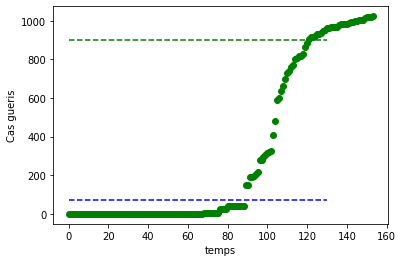

In [15]:
import matplotlib.pyplot as plt
plt.plot(X,y,'go')
plt.plot([0,130],[70,70],'b--')
plt.plot([0,130],[900,900],'g--')
plt.xlabel('temps')
plt.ylabel('Cas gueris')

In [16]:
bins = [0,70,900,1300]
y_binned = np.digitize(y,bins)

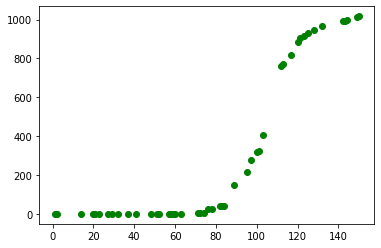

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.3,
                                                 stratify=y_binned)
plt.plot(X_test,y_test,'go')

In [18]:
def logistic_model(x,a,b,c):
  return c/(1+np.exp(-(x-b)/a))

In [19]:
from scipy.optimize import curve_fit
params = curve_fit(logistic_model,X_train,y_train)
a= params[0][0]
b= params[0][1]
c = params[0][2]
print("a",a)
print("b",b)

a 7.149890821413858
b 103.78585141721597


In [20]:
y_test_lin_pres = logistic_model(X_test,a,b,c)
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
mean_squared_error(y_test,y_test_lin_pres)

392.59124942761565

In [22]:
r2_score(y_test,y_test_lin_pres)

0.9976549717629467

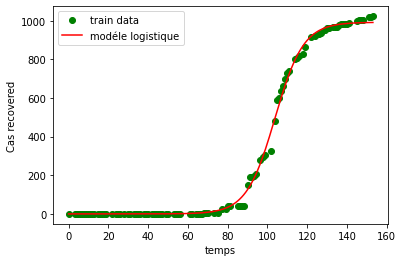

In [23]:
y_lin_pred = logistic_model(X,a,b,c)
plt.plot(X_train,y_train,'go',label='train data')
plt.plot(X,y_lin_pred,'r-',label='modéle logistique')
plt.xlabel('temps')
plt.ylabel('Cas recovered')
plt.legend()